# **MARKET SEGMENTATION**

## **Import the relevant libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
data = pd.read_csv('C:\\Users\\HP\\Downloads\\3.12. Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


## Plot the features

Text(0, 0.5, 'Loyalty')

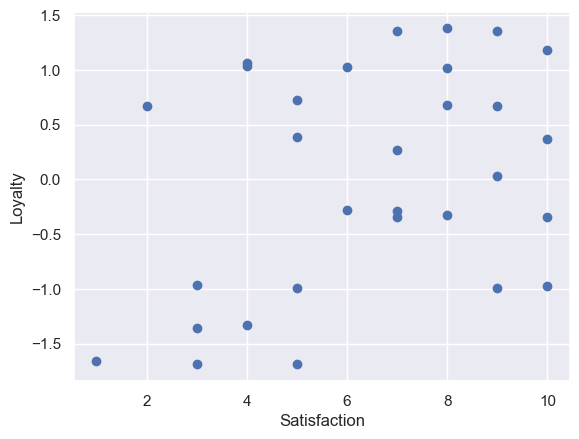

In [3]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

In [4]:
x = data.copy()

## Standardize the features

In [5]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

## Determining the number of clusters (The Elbow method)

In [6]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(i, random_state=42)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

[59.999999999999986,
 30.35236058808774,
 18.12965944606323,
 10.247181805928422,
 7.792695153937187,
 6.586212092192188,
 6.173493205927985,
 4.927070857759043,
 3.951668467413593]

## OR

In [7]:
wcss2 = [KMeans(i, random_state=42).fit(x_scaled).inertia_ for i in range(1, 10)]
wcss2

[59.999999999999986,
 30.35236058808774,
 18.12965944606323,
 10.247181805928422,
 7.792695153937187,
 6.586212092192188,
 6.173493205927985,
 4.927070857759043,
 3.951668467413593]

## Plotting the elbow method using wcss

Text(0.5, 1.0, 'The Elbow Method')

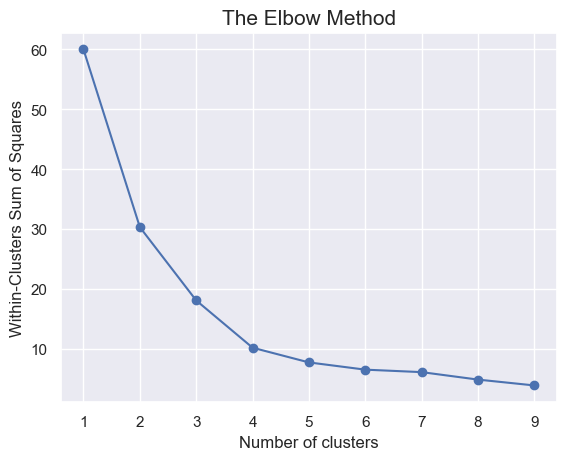

In [8]:
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Clusters Sum of Squares')
plt.title('The Elbow Method', size=15)

## Using silhouette scorer with gridsearch to further pinpoint the actual number of clusters

In [9]:
# Using silhouette_scorer to further pinpoint the number of clusters
def silhouette_scorer(estimator, x_scaled):
    cluster_labels = estimator.fit_predict(x_scaled)
    return silhouette_score(x_scaled, cluster_labels)

In [10]:
# Set the hyperparameters for the gridsearch
kmeans_gcv = KMeans(random_state=42)
param_grid = {
    'n_clusters' : np.arange(4, 7),
    'init' : ['k-means++', 'random'],
    'n_init' : [10, 20, 30],
    'max_iter' : [300, 400, 500]
}

In [11]:
# Perform a gridsearch to identify the clusters
gridsearch = GridSearchCV(estimator=kmeans_gcv, param_grid=param_grid, cv=5, scoring=silhouette_scorer)
gridsearch.fit(x_scaled)

GridSearchCV(cv=5, estimator=KMeans(random_state=42),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [300, 400, 500],
                         'n_clusters': array([4, 5, 6]),
                         'n_init': [10, 20, 30]},
             scoring=<function silhouette_scorer at 0x00000283C93A4180>)

In [12]:
gridsearch.best_params_

{'init': 'k-means++', 'max_iter': 300, 'n_clusters': 4, 'n_init': 10}

## Clustering

In [13]:
kmeans = KMeans(4, random_state=42)
kmeans.fit(x_scaled)
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x_scaled)
clusters.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,3
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,0


## Plotting the clusters

Text(0.5, 1.0, 'Customer Satisfactory and Loyalty Level')

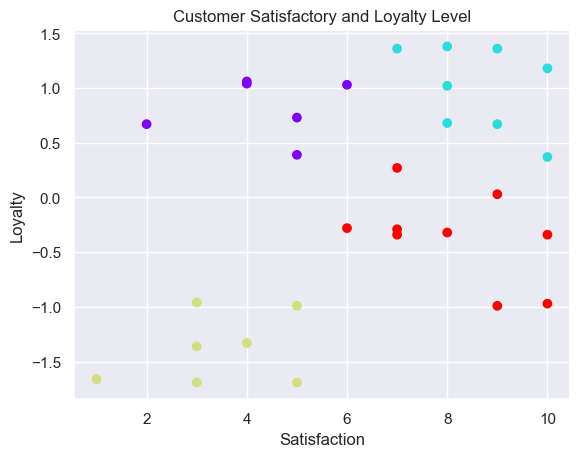

In [14]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.title('Customer Satisfactory and Loyalty Level')